# Project: Investigation into TMDB movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda1">Exploratory Data Analysis</a></li>
<li><a href="#eda1">Research Question 1: "What are the most popular features for the top grossing movies?"</a></li>
<li><a href="#eda2">Research Question 2: "What are the most popular genres throughout the years?"</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset used in this project is from Udacity. The data contains around 10,000 movie data collected from [The Movie Database](https://www.themoviedb.org/) and cleaned by Udacity. It contains contains general information about various movies including director, year relased and vote count for movies made between 1960 and 2015.

The questions that will be explored with this data set is:  
> "What are the most popular features for the top grossing movies?"  
> "What are the most popular genres throughout the years?"

In [53]:
#Imports for the project
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Load in the data and display the first 3 rows of the data

In [54]:
#Create a dataframe from the csv file and display the first 3 rows
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Check the shape of the dataframe along with the count and type of each column within the data

In [55]:
#Check the shape (rows, columns)
df.shape

(10866, 21)

In [56]:
#Check the type and non-null count of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [57]:
#Display statistical information about the non-string columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Feature breakdown

| FEATURE              | DESCRIPTION                                                                   | TYPE   |
|----------------------|-------------------------------------------------------------------------------|--------|
| id                   | Data id within the CSV file                                                   | int    |
| imdb_id              | Data id from the IMDB website                                                 | string |
| popularity           | Popularity ranking of the movie                                               | float  |
| budget               | Budget of the movie based on USD from the year released                       | int    |
| revenue              | Revenue of the movie based on USD from the year released                      | int    |
| original_title       | Title of the movie                                                            | string |
| cast                 | Movie cast                                                                    | string |
| homepage             | Link to the movie's homepage                                                  | string |
| director             | Director of the movie                                                         | string |
| tagline              | Tag line associated with the movie                                            | string |
| keywords             | Keywords used to find the movie during a websearch                            | string |
| overview             | Description of the movie                                                      | string |
| runtime              | Runtime of the movie in minutes                                               | int    |
| genres               | List of genres associated with the movie                                      | string |
| production_companies | Name of the production company                                                | string |
| release_date         | Exact release date                                                            | string |
| vote_count           | Number of votes recieved for a movie on the IMDB website                      | int    |
| vote_average         | Average vote given to a movie on the IMDB website                             | float  |
| release_year         | Year a movie was released                                                     | int    |
| budget_adj           | Budget of the movie based on USD from the year released adjusted to 2015 USD  | string |
| revenue_adj          | Revenue of the movie based on USD from the year released adjusted to 2015 USD | string |

Looking at the info result we can see that there are a few features that have missing data. It also seems like these features are not needed for the analysis of this data. For example, 'homepage' and 'tagline'. Both of these don't contain any data that is useful to this analysis. There is also a few other features that look like they can be dropped.  
There are also some features that have a lot of 0 values such as 'revenue' and 'runtime'. The runtime 0 values can be replaced with the average runtime for all movies. 'Budget' and 'revenue' features with 0 will be converted to NaN to give a more realistic value range.

## Data Cleaning

In [58]:
#Drop the unnecessary columns
df.drop(['id', 'imdb_id', 'tagline', 'keywords', 'overview', 'production_companies', 'homepage', 'cast', 'release_date'], 
        axis=1, inplace=True)

The following features were dropped:  

| FEATURE              | REASON                                                                                            |
|----------------------|---------------------------------------------------------------------------------------------------|
| id                   | This is only a reference within the CSV file and is automatically generated within the dataframe  |
| imdb_id              | IMDB reference number. Not used as only has meaning on the IMDB site                              |
| cast                 | Not a full cast listing                                                                           |
| homepage             | This is just a link to the movie's homepage                                                       |
| tagline              | This is different for each movie                                                                  |
| keywords             | Keywords associated with a movie - no consistency in them                                         |
| overview             | Similar to tagline. Each movie has it's own very different line.                                  |
| production_companies | Most of the production companies have Disney as a parent company so decided not to use this       |

In [59]:
#Display the rows where the genre column has a null or NaN value
df[df.isnull().genres]

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,0,0,Belli di papÃ,Guido Chiesa,100,NaN,21,6.1,2015,0.00000,0.0
620,0.129696,0,0,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,13,5.0,2015,0.00000,0.0
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,NaN,13,6.8,2014,0.00000,0.0
1712,0.302095,0,0,Prayers for Bobby,Russell Mulcahy,88,NaN,57,7.4,2009,0.00000,0.0
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,Bruce Hendricks,76,NaN,11,7.0,2009,0.00000,0.0
2370,0.081892,0,0,Freshman Father,Michael Scott,0,NaN,12,5.8,2010,0.00000,0.0
2376,0.068411,0,0,Doctor Who: A Christmas Carol,NaN,62,NaN,11,7.7,2010,0.00000,0.0
2853,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan,110,NaN,12,7.2,2001,0.00000,0.0
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Kim Jin-Yeong,96,NaN,11,6.1,2008,0.00000,0.0
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Danny Boyle,220,NaN,12,8.3,2012,0.00000,0.0


In [60]:
#Display the number of rows that are duplicates
sum(df.duplicated())

1

In [61]:
#Drop the rows where there is a null value and where the data is duplcated
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10800 non-null float64
budget            10800 non-null int64
revenue           10800 non-null int64
original_title    10800 non-null object
director          10800 non-null object
runtime           10800 non-null int64
genres            10800 non-null object
vote_count        10800 non-null int64
vote_average      10800 non-null float64
release_year      10800 non-null int64
budget_adj        10800 non-null float64
revenue_adj       10800 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In [62]:
#Check the statistics of the non-string values after cleaning
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04
mean,0.649455,1.471114e+07,4.006558e+07,102.189722,218.600741,5.970880,2001.289537,1.765437e+07,5.167714e+07
std,1.002441,3.098677e+07,1.173193e+08,30.783873,577.165055,0.933006,12.819545,3.438403e+07,1.450182e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.209157,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.385471,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.717508,1.564374e+07,2.455409e+07,111.250000,147.000000,6.600000,2011.000000,2.103337e+07,3.408743e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [63]:
#Replace the 0 values in the budget, revenue, budget_adj and revenue_adj columns with NaN 
df.budget = df.budget.replace(0,np.nan)
df.revenue = df.revenue.replace(0,np.nan)
df.budget_adj = df.budget_adj.replace(0,np.nan)
df.revenue_adj = df.revenue_adj.replace(0,np.nan)

In [64]:
#Replace where the runtime is 0 with the mean runtime and once more show the statistics of non-string columns
mean = df[df['runtime']!=0].runtime.mean()
df.loc[df['runtime'] == 0, 'runtime'] = mean
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,5.164000e+03,4.848000e+03,10800.000000,10800.000000,10800.000000,10800.000000,5.164000e+03,4.848000e+03
mean,0.649455,3.076690e+07,8.925500e+07,102.455347,218.600741,5.970880,2001.289537,3.692239e+07,1.151223e+08
std,1.002441,3.891327e+07,1.620930e+08,30.339746,577.165055,0.933006,12.819545,4.196755e+07,1.988706e+08
min,0.000188,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.209157,6.000000e+06,7.724244e+06,90.000000,17.000000,5.400000,1995.000000,8.111388e+06,1.046477e+07
50%,0.385471,1.700000e+07,3.187604e+07,99.000000,39.000000,6.000000,2006.000000,2.274082e+07,4.396405e+07
75%,0.717508,4.000000e+07,9.997431e+07,111.250000,147.000000,6.600000,2011.000000,5.008384e+07,1.316524e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There was 1 duplicated row and 23 rows where there were NaN figures in the genres feature list. The duplicated row was dropped and I also decided to drop the 23 with NaN figures as there is only 23 and to find insert the correct data would be time consuming.

0 counts in 'budget', 'revenue', 'budget_adj' and 'revenue_adj' were converted to NaN values.

Also, as there are a lot of values within the runtime feature that have a runtime of 0 minutes. For these values, I have set the runtime to be the total mean excluding the 0 values.

As the data for the genres in the main dataframe only gives a string of genres seperated by a '|' it will also be useful to split them.
A second dataframe is created that contains each genre on a new line for that movie. For example if a movie is listed as 'Action|Adventure' then there would be two rows for that movie. One row with a genre listed as 'Action' and another with the genre listed as 'Adventure'.

In [65]:
#Split the genre strings into new rows for each genre for a given movie
genre_split = (df.set_index(df.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'})
   .loc[:, df.columns]
)
genre_split.head(5)

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Adventure,5562,6.5,2015,1.379999e+08,1.392446e+09
2,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Science Fiction,5562,6.5,2015,1.379999e+08,1.392446e+09
3,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
4,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action,6185,7.1,2015,1.379999e+08,3.481613e+08


In [66]:
#List all the genres that appear once they have been split up
genre_split.genres.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

<a id='eda1'></a>
## Exploratory Data Analysis

### Research Question 1: "What are the most popular features for the top grossing movies?"

In [67]:
#calculate the 98th percentile figure and how many movies are there in the 98th percentile
rev98 = genre_split.revenue_adj.quantile(0.98)
print('Adjusted revenue (in 2015 USD) 98th percentile: ${:,.2f}USD'.format(rev98))
print('Number of movies in the 98th percentile: {}'.format(len(genre_split.query('revenue_adj >= {}'.format(rev98)))))

Adjusted revenue (in 2015 USD) 98th percentile: $787,338,009.24USD
Number of movies in the 98th percentile: 257


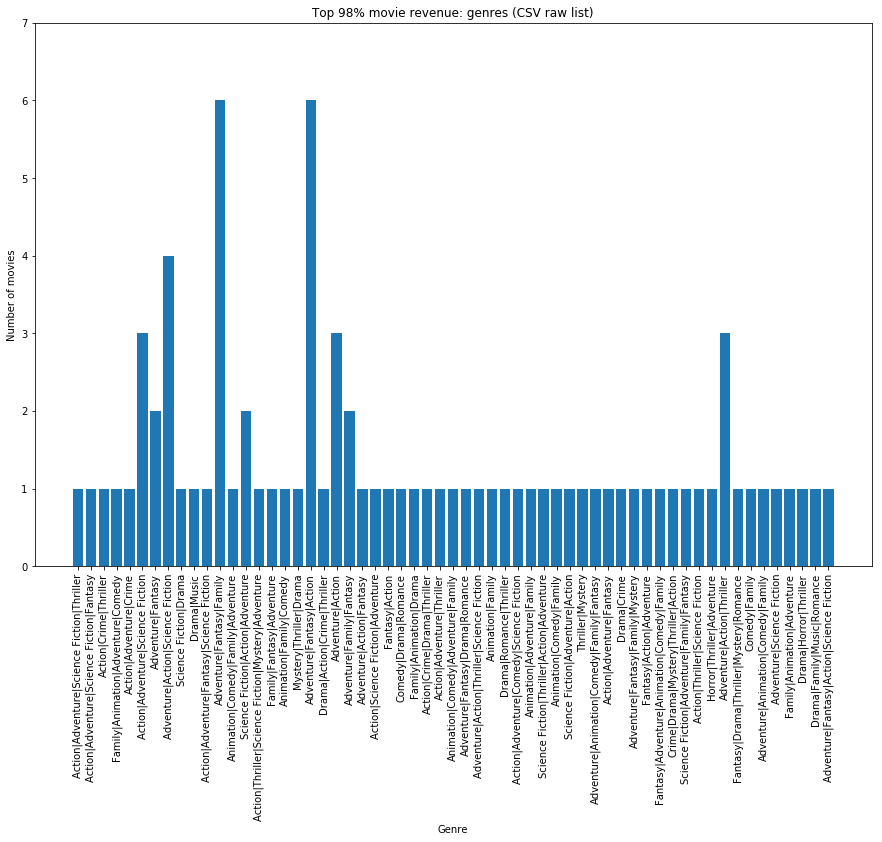

In [68]:
#Using the original dataframe from the CSV, view how many movies have the same genre string in the 98th percentile
#Using the counter function, create a dict for the graph data points
genre_key=Counter(df.query('revenue_adj >= {}'.format(rev98)).genres).keys()
genre_value=Counter(df.query('revenue_adj >= {}'.format(rev98)).genres).values()

plt.figure(figsize=(15,10))
plt.bar(genre_key, genre_value)
plt.title ('Top 98% movie revenue: genres (CSV raw list)')
plt.ylabel('Number of movies')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,8, step=1))
plt.show()

The above graph shows the un-split genre data for the 98th percentile revenue (adjusted to 2015 USD). The graph shows that the 2 top genre groups are "Adventure/Fantasy/Action" and "Adventure/Fantasy/Family", both which have 6 movies each with that genre group.
"Adventure/Fantasy/Science Fiction" is the 3rd most common genre group. 
From these three points it can be seen that movies with "adventure" and "action" genres are common for high revenue movies.

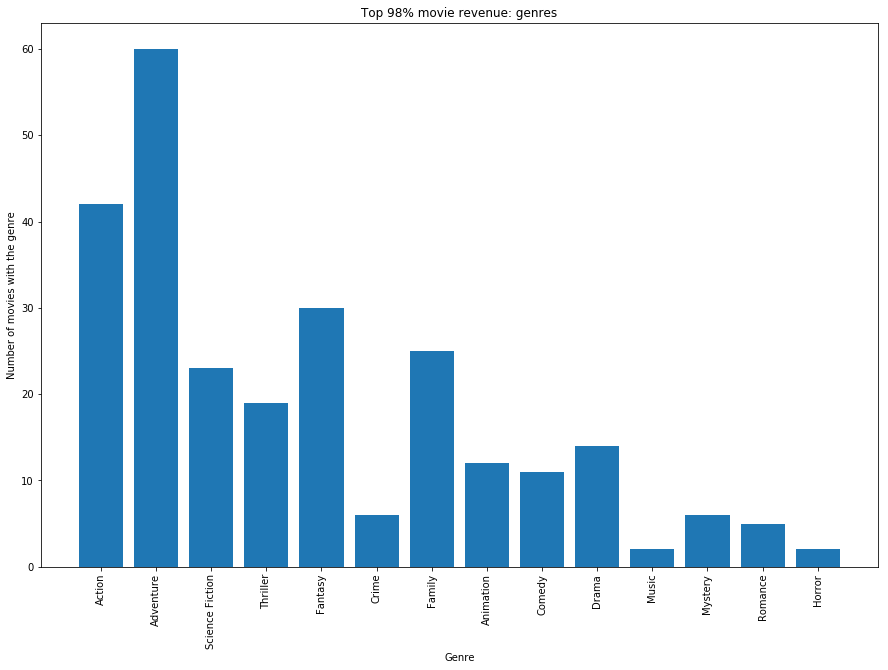

In [69]:
#Using the genre_split dataframe, view how many times a genre appears in the 98th percentile of movies
genres_98 = genre_split.query('revenue_adj >= {}'.format(rev98)).genres
plt.figure(figsize=(15,10))
plt.bar(Counter(genres_98).keys(), Counter(genres_98).values())
plt.title ('Top 98% movie revenue: genres')
plt.ylabel('Number of movies with the genre')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.show()

Following on from the first graph, this graph shows the genres after they have been split-up.
It shows that movies that fall into "action" and "adventure" genres are likely to have high revenue.

In total there are 20 different genres in this data set.'Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie' and 'Foreign'.  
From these 2 above graphs, it can mean that movies with the genres of 'War', 'History' 'Documentary', 'TV Movie' and 'Foreign' aren't high revenue earning movies.

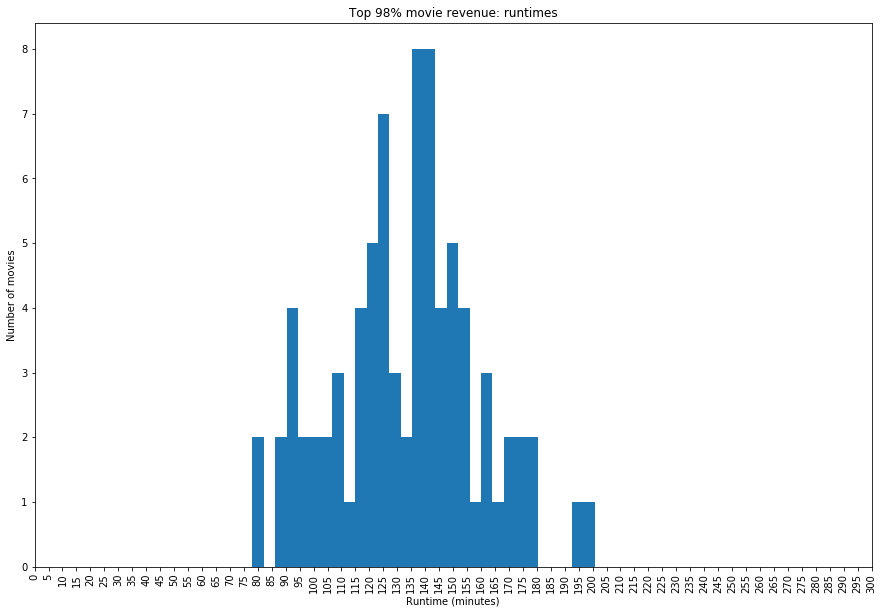

In [70]:
#Create a histogram of the 98th percentile of movies' runtimes
runtime98=df.query('revenue_adj >= {}'.format(rev98)).runtime
plt.figure(figsize=(15,10))
plt.hist(runtime98, bins=30)
plt.title ('Top 98% movie revenue: runtimes')
plt.ylabel('Number of movies')
plt.xlabel('Runtime (minutes)')
plt.xticks(np.arange(0, 305, step=5), rotation=90) #force the graph to show the x label from the min to max of the overall runtimes
plt.show()

For a movie to have a good chance to make it a 98th percentile revenue earner, it needs to be about about 2 hour 20mins-25mins. The majority of the movies falling between 85 minutes and 180 minutes runtime.
This graph also have a good bell curve shape to it, although there is an interesting drop from 125mins to 135mins.

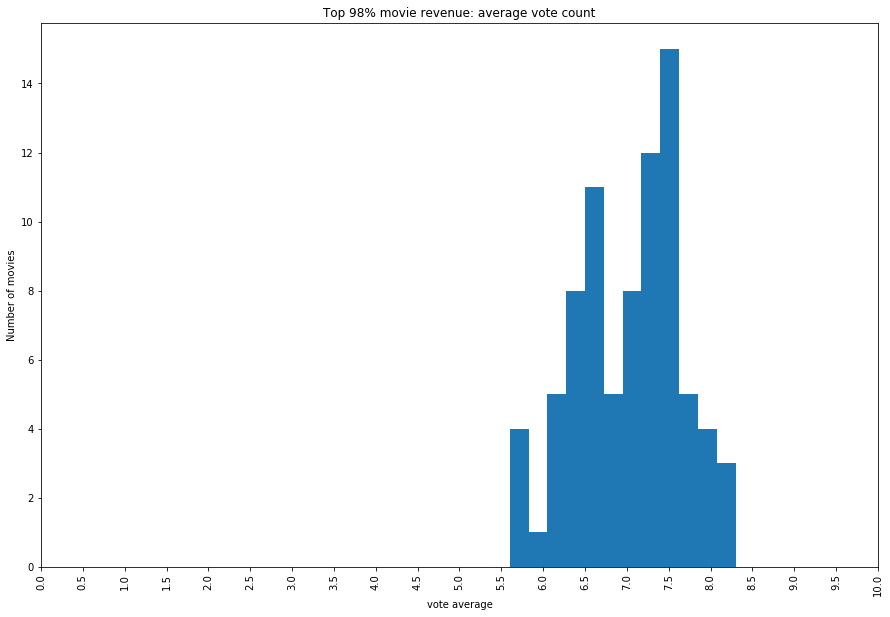

In [71]:
#Using the counter function, create a dict so that a histogram of the 98th percentile of movies' avg vote count can be displayed
vote98=df.query('revenue_adj >= {}'.format(rev98)).vote_average
plt.figure(figsize=(15,10))
plt.hist(vote98, bins=12)
plt.title ('Top 98% movie revenue: average vote count')
plt.ylabel('Number of movies')
plt.xlabel('vote average')
plt.xlim(0, 10)
plt.xticks(np.arange(0, 10.5, step=0.5), rotation=90) #Force the x axis to be from a 0 score to a perfect 10 score.
plt.show()

The mean for all votes within this dataset is 5.97. I was expecting the histogram to be more towards a perfect score. In this dataset the highest vote a movie got was 9.2, and the 75th percentile is 6.6. The above histogram has the most popular vote for high revenue moves at about 7.5 and there are no movies greater than an 8.3.  
Even though a movie gets a very high vote doesn't mean that it will be a high revenue earner, but at the same time there are very few movies below the mean vote rating and no movies under a rating of 5.

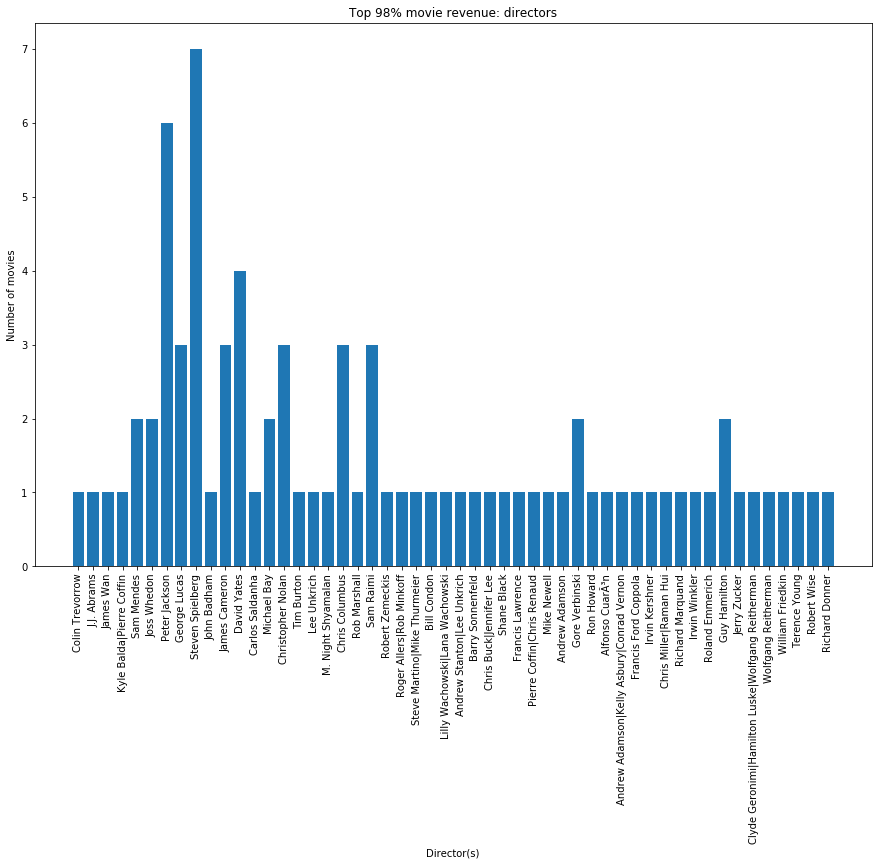

In [72]:
#Using the counter function, create a dict so that a graph of the 98th percentile of movies' directors can be displayed
director_key=Counter(df.query('revenue_adj >= {}'.format(rev98)).director).keys()
director_value=Counter(df.query('revenue_adj >= {}'.format(rev98)).director).values()

plt.figure(figsize=(15,10))
plt.bar(director_key, director_value)
plt.title ('Top 98% movie revenue: directors')
plt.ylabel('Number of movies')
plt.xlabel('Director(s)')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,8, step=1))
plt.show()

This graph shows that there are 2 directors that can be associated with high revenue movies. Steven Spielberg and Peter Jackson. Third most popular is David Yates.  
There are a lot of directors that only have 1 movie in the 98th percentile. 

<a id='eda2'></a>
### Research Question 2: "What are the most popular genres throughout the years?"

In [73]:
#Group each year, then order each year by the average vote. From the grouped years select only the top 3 and create a new dataframe
by_year = df.groupby(['release_year']).apply(lambda x: x.sort_values(["vote_average"], ascending = False)).reset_index(drop=True)
top3_by_year = by_year.groupby(['release_year']).head(3)

In [74]:
#Using the top 3 dataframe split each movies' genre list 
Q2_genre_split = (top3_by_year.set_index(top3_by_year.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'})
   .loc[:, df.columns])

In [75]:
years=np.arange(1960, 2016) #array of years
unique_genres = genre_split.genres.unique() #List of genres

#Create a dict that counts the genres by year
genre_count_all_dict={}
for i in years:
    genre_count_all_dict[i] = Counter(genre_split.query('release_year == {}'.format(i)).genres)

#Create a new dict that takes the genre_count_all_dict counter and pads the missing genre values with 0
genres_years_all_dict={}
for i in years:
    genre_list=[]
    for x in unique_genres:
        if x in genre_count_all_dict[i]:
            genre_list.append(genre_count_all_dict[i][x])
        else:
            genre_list.append(0)
    genres_years_all_dict[i] = genre_list

#Create a dataframe from the dictionary
genre_count_all_df = pd.DataFrame.from_dict(genres_years_all_dict, orient='index', columns=unique_genres)

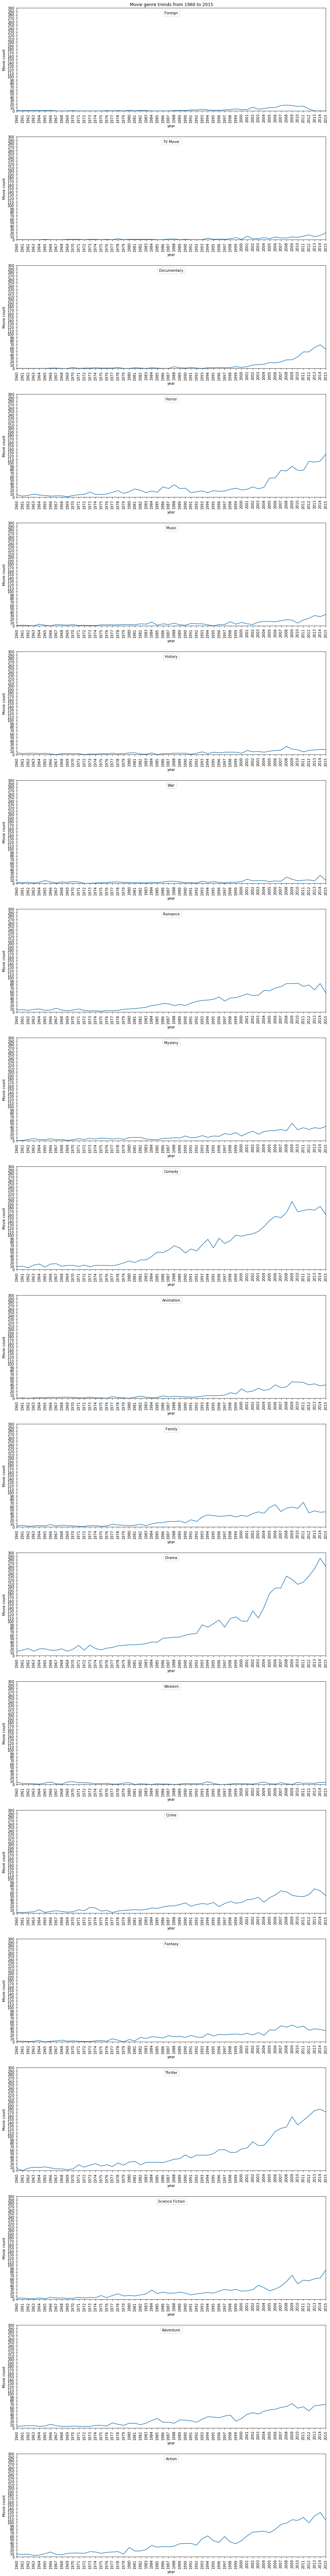

In [76]:
#Create the plots of number of movies vs release year for each genre
fig = plt.figure(figsize=(15,10))
a = 0.1
for i in unique_genres:
    ax1 = fig.add_axes([0.1, a, 0.8, 0.4], ylim=(0,300), yticks=(np.arange(0,310, step=10)))
    ax1.plot(genre_count_all_df[i])
    plt.xlim(1960, 2015)
    plt.xticks(np.arange(1960,2016, step=1), rotation=90)
    plt.xlabel('year')
    plt.ylabel('Movie count')
    plt.legend(handlelength=0, loc='upper center', handletextpad=0, fancybox=True);
    a=a+0.5
    
plt.title('Movie genre trends from 1960 to 2015');

### Observations
There are a few movies that have a distinct upwards trend. Comedy, thriller, drama and horror all follow this trend. In contrast to this there are five genres that have not been popluar types for movies; foreign, TV movies, history, war and western.

Drama is the most popular movie genre throughout this dataset. It peaked in 2014 where there was approximatley 290 movies that year. 
The documentry genre is has quite a flat trend until about 2000 where it changed and had has a sharp increase in the amount of movies being released.   
The foreign film genre is interesting as from 1990 to 2010 it seems to be increasing in popularity, but from 2013 it drops with 2014 and 2015 both having 0 foreign movies in this dataset.

In [77]:
#Create a dict that counts the genres by year for the top 3 movies
genre_count_dict={}
for i in years:
    genre_count_dict[i] = Counter(Q2_genre_split.query('release_year == {}'.format(i)).genres)

#Create a new dict that takes the genre_count_all_dict counter and pads the missing genre values with 0 for the top 3 movies
genres_years_dict={}
for i in years:
    genre_list=[]
    for x in unique_genres:
        if x in genre_count_dict[i]:
            genre_list.append(genre_count_dict[i][x])
        else:
            genre_list.append(0)
    genres_years_dict[i] = genre_list
    
genre_count_df = pd.DataFrame.from_dict(genres_years_dict, orient='index', columns=unique_genres)

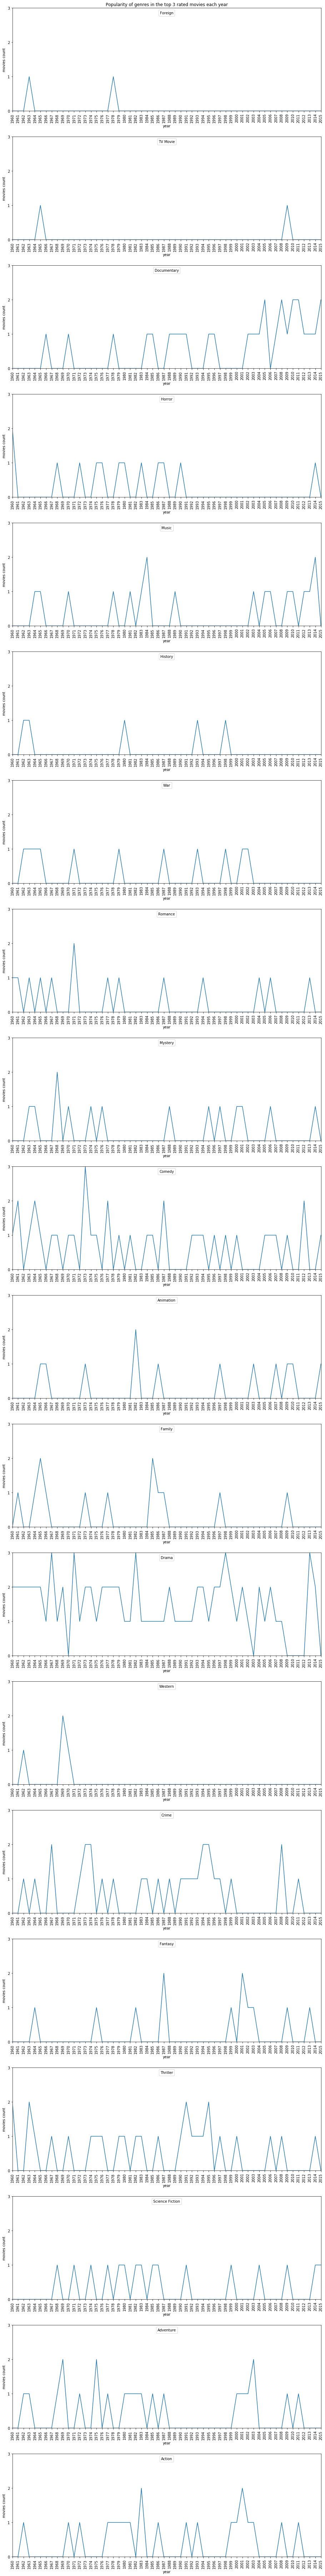

In [78]:
#Create the plots of number of top 3 movies vs release year for each genre 
fig = plt.figure(figsize=(15,10))
a = 0.1
for i in unique_genres:
    ax1 = fig.add_axes([0.1, a, 0.8, 0.4], ylim=(0,3), yticks=(np.arange(0,4, step=1)))
    ax1.plot(genre_count_df[i])
    plt.xlim(1960, 2015)
    plt.xticks(np.arange(1960,2016, step=1), rotation=90)
    plt.xlabel('year')
    plt.ylabel('movies count')
    plt.legend(handlelength=0, loc='upper center', handletextpad=0, fancybox=True);
    a=a+0.5

plt.title('Popularity of genres in the top 3 rated movies each year');

### Observations
The previous set of graphs show the overall trend of movie genres, while this set of graphs shows the three highest rated moves for each year.  

In the previous set of trend graphs, there were five genres that had a low movie count. The trend also follows to the top three movies for each year, with most of the genres only having two or three years with a movie in the top three. Though, there is one movies, war, which has a lot of movies in the top three. There was also a trend in them from 1962 to 1965. It possible this is because of the Vietnam War happening during this this time. From 1965, approximately  every nine years there is a new war genre movie that is rated in the top three.  

The genre with the most movies was drama and it can be seen that there is a lot also within the top three. In fact, the drama genre has very few years with a zero count in the top three.

In the first set of trend graphs, the foreign genre had an overall higher count of movies from 1990 to 2010, but there are no movies in the top three within this period. Although there are two peaks but 1963 and in 1978, long before the trend became popular.

<a id='conclusions'></a>
## Conclusions

To conclude, it seems that for a movie to make into the 98th percentile of revenue earnings, it needs to be included the adventure or action genre, with a runtime of around 145 minutes and directed by Steven Spielgberg or Peter Jackson. 

With regards to the various genre trends, it's difficult to say the reason for the rise in certian genres, thriller for example. It difficult to say if the rise is due to public demand and therefore more movies have been released or if it is because there is a large number movies released and it is just a percentage of the total.  

One limitation with this data is under the foreign genre. There are a lot of non-English movies released per year, but it's uncertian what the requirements are to make it into this dataset.